5
0
4
1
9
2
1
3
1
4
3
5
3
6
1
7
2
8
6
9
4
0
9
1
1


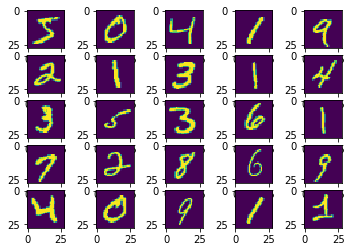

In [10]:
# -*- coding: utf-8 -*-   
import struct  
import matplotlib.pyplot as plt  
import operator
import numpy as np
 
# 读取trainingMat
filename = 'train-images-idx3-ubyte'  
binfile = open(filename , 'rb')  
buf = binfile.read()  
index = 0  
#'>IIII'使用大端法读取四个unsigned int32  
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)  
index += struct.calcsize('>IIII')  
 
#读取labels
filename1 =  'train-labels-idx1-ubyte'  
binfile1 = open(filename1 , 'rb')  
buf1 = binfile1.read()  
  
index1 = 0  
#'>IIII'使用大端法读取两个unsigned int32  
magic1, numLabels1 = struct.unpack_from('>II' , buf , index)  
index1 += struct.calcsize('>II')  
 
#获取经过PCA  处理过的traingMat 和 label
#for i in range(trainingNumbers): 
for i in range(25):   
	im = struct.unpack_from('>784B' ,buf, index)  
	index += struct.calcsize('>784B')  
	im = np.array(im) 
	im=im.reshape(28,28)
	plt.subplot(5,5,i+1)
	plt.imshow(im)
	#读取标签
	numtemp = struct.unpack_from('1B' ,buf1, index1) 
	label = numtemp[0]
	index1 += struct.calcsize('1B')
	print(label)
plt.show()
 

In [33]:
# -*- coding: utf-8 -*-   
from numpy import *
import numpy as np  
import struct  
import matplotlib.pyplot as plt  
import operator
 
#定义一个全局特征转换变量　这个变量是在PCA中求出的
global redEigVects
 
def pca(dataMat, topNfeat=9999999):
	global redEigVects
	meanVals = mean(dataMat, axis=0)	
	meanRemoved = dataMat - meanVals #remove mean
	covMat = cov(meanRemoved, rowvar=0)
	eigVals,eigVects = linalg.eig(mat(covMat))
	eigValInd = argsort(eigVals)#sort, sort goes smallest to largest
	eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
	redEigVects = eigVects[:,eigValInd]   #reorganize eig vects largest to smallest
	#得到低维度数据
	lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
	reconMat = (lowDDataMat * redEigVects.T) + meanVals
	return lowDDataMat, reconMat
def KNN(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1) #axis=0, 表示列。axis=1, 表示行。
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        return voteIlabel
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
 
# 读取trainingMat
filename = 'train-images-idx3-ubyte'  
binfile = open(filename , 'rb')  
buf = binfile.read()  
index = 0  
#'>IIII'使用大端法读取四个unsigned int32  
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)  
index += struct.calcsize('>IIII')  
'''  
# 输出大端数  
print magic  
print numImages  
print numRows  
print numColumns  
'''
 
#读取labels
filename1 =  'train-labels-idx1-ubyte'  
binfile1 = open(filename1 , 'rb')  
buf1 = binfile1.read()  
  
index1 = 0  
#'>IIII'使用大端法读取两个unsigned int32  
magic1, numLabels1 = struct.unpack_from('>II' , buf , index)  
index1 += struct.calcsize('>II')  
 
 
    #设置训练数目为2500个
trainingNumbers=2500
#降维后的维度为７个维度　降维后的数据为40维度
DD=40
#初始化traingMat
trainingMatO=zeros((trainingNumbers,28*28))
#初始化标签
trainingLabels=[]
 
 
#获取经过PCA  处理过的traingMat 和 label
#for i in range(trainingNumbers): 
for i in range(trainingNumbers):   
	im = struct.unpack_from('>784B' ,buf, index)  
	index += struct.calcsize('>784B')  
	im = np.array(im) 
	trainingMatO[i]=im
	#读取标签
	numtemp = struct.unpack_from('1B' ,buf1, index1) 
	label = numtemp[0]
	index1 += struct.calcsize('1B')
	trainingLabels.append(label)
 
#PCA
trainingMat,reconMat=pca(trainingMatO,DD)
'''
**************************************************
'''
# 读取testMat
filename3 = 't10k-images-idx3-ubyte'  
binfile3 = open(filename3 , 'rb')  
buf3 = binfile3.read()  
index3 = 0  
#'>IIII'使用大端法读取四个unsigned int32  
magic3, numImages3 , numRows3 , numColumns3 = struct.unpack_from('>IIII' , buf3 , index3)  
index3 += struct.calcsize('>IIII')  
 
#读取labels
filename4 =  't10k-labels-idx1-ubyte'  
binfile4 = open(filename4, 'rb')  
buf4 = binfile4.read()  
  
index4= 0  
#'>IIII'使用大端法读取两个unsigned int32  
magic4, numLabels4 = struct.unpack_from('>II' , buf4 , index4)  
index4 += struct.calcsize('>II')  
 
'''
**************************************************
'''
#测试数据
testNumbers=300
#测试维度
errCount=0
#获取经过PCA  处理过的testMat 和 label
for i in range(testNumbers):  
	im3 = struct.unpack_from('>784B' ,buf3, index3)  
	index3 += struct.calcsize('>784B')  
	im3 = np.array(im3)  
	
	#新进来的数据　进行降维处理
	meanVals = mean(im3, axis=0)
	meanRemoved = im3 - meanVals #remove mean
	#这个时候使用的降维特征变量为上边给训练数组得出的特征量
	testingMat=meanRemoved*redEigVects
	
	#读取标签
	numtemp4 = struct.unpack_from('1B' ,buf4, index4) 
	label4 = numtemp4[0]
	index4 += struct.calcsize('1B')
	#.getA() 函数的意思是　获取该矩阵　好像PCA算法返回的是一个对象　所以此处提取了一下矩阵数组
	classifierResult = KNN(testingMat.getA(), trainingMat.getA(), trainingLabels, 10)
	print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, label4))
	if  classifierResult is not label4:
		errCount=errCount+1
print ('the err rate is ',float(errCount)/testNumbers)
 

the classifier came back with: 7, the real answer is: 7
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 4
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 6, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 7, the real answe

In [12]:
import scipy.io as sio 
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
matfn = '/Users/minyifan/Downloads/digits4000.mat' #the file path
data = sio.loadmat(matfn)

In [13]:
digits_lables=data['digits_labels']
digits_vec=data['digits_vec']
testset=data['testset']
trainset=data['trainset']

In [54]:
testingMat.getA()

array([[  2.32065240e+02+0.j,   5.74758351e+02+0.j,   2.28289385e+02+0.j,
         -6.28076213e+02+0.j,   1.09907927e+03+0.j,   3.03671603e+02+0.j,
         -6.34409580e+01+0.j,  -1.37753191e+01+0.j,   1.43369099e+02+0.j,
          3.47962625e+02+0.j,   2.09368151e+02+0.j,   8.73255703e+01+0.j,
         -2.20579908e+02+0.j,  -9.75810967e+01+0.j,  -2.46050112e+02+0.j,
         -1.44278290e+02+0.j,   1.90476675e+01+0.j,  -3.19077174e+02+0.j,
          1.62556475e+02+0.j,   7.25677277e-01+0.j,   3.15760892e+02+0.j,
          5.52839133e+01+0.j,  -2.15573050e+02+0.j,   3.45645087e+02+0.j,
         -2.47793363e+01+0.j,  -1.10807278e+02+0.j,  -2.57931894e+02+0.j,
         -3.00840511e+02+0.j,  -9.70021294e+01+0.j,   1.21166045e+02+0.j,
         -1.60314467e+01+0.j,  -2.49532592e+01+0.j,  -6.79481111e+01+0.j,
          2.26963175e+02+0.j,   1.86958302e+02+0.j,  -3.66424049e+02+0.j,
         -1.49643273e+02+0.j,  -1.44791891e+02+0.j,   1.03605722e+01+0.j,
          9.14995248e+01+0.j]])

In [76]:
trainingMat.getA().shape

(2500, 40)

In [74]:
def KNN(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1) #axis=0, 表示列。axis=1, 表示行。
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        return voteIlabel
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [75]:
KNN(testingMat.getA(), trainingMat.getA(), trainingLabels, 10)

8

In [77]:
testingMat.getA()

array([[  2.32065240e+02+0.j,   5.74758351e+02+0.j,   2.28289385e+02+0.j,
         -6.28076213e+02+0.j,   1.09907927e+03+0.j,   3.03671603e+02+0.j,
         -6.34409580e+01+0.j,  -1.37753191e+01+0.j,   1.43369099e+02+0.j,
          3.47962625e+02+0.j,   2.09368151e+02+0.j,   8.73255703e+01+0.j,
         -2.20579908e+02+0.j,  -9.75810967e+01+0.j,  -2.46050112e+02+0.j,
         -1.44278290e+02+0.j,   1.90476675e+01+0.j,  -3.19077174e+02+0.j,
          1.62556475e+02+0.j,   7.25677277e-01+0.j,   3.15760892e+02+0.j,
          5.52839133e+01+0.j,  -2.15573050e+02+0.j,   3.45645087e+02+0.j,
         -2.47793363e+01+0.j,  -1.10807278e+02+0.j,  -2.57931894e+02+0.j,
         -3.00840511e+02+0.j,  -9.70021294e+01+0.j,   1.21166045e+02+0.j,
         -1.60314467e+01+0.j,  -2.49532592e+01+0.j,  -6.79481111e+01+0.j,
          2.26963175e+02+0.j,   1.86958302e+02+0.j,  -3.66424049e+02+0.j,
         -1.49643273e+02+0.j,  -1.44791891e+02+0.j,   1.03605722e+01+0.j,
          9.14995248e+01+0.j]])

In [78]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255.   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,32]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 32, 64]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## fc1 layer ##
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images[:1000], mnist.test.labels[:1000]))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.052
0.751
0.836
0.884
0.908
0.926
0.93
0.938
0.941
0.945
0.951
0.954
0.961
0.962
0.962
0.96
0.962
0.966
0.97
0.967


In [ ]:
yh